# Exercise Sheet 2

Download	 the	 file	 poly.csv from	 ISIS.	 The	 file	 consists	 oft	 two	 columns.	 The	 first	 column	 contains input	
examples	$x_i$ and the	second	column	contains the	corresponding outputs $y_i$.

# Exercise 2.1
Consider	the	following	empirical	error	function:

$
\begin{align}
E_m[h_w,\lambda] = \frac{1}{2m} \sum \limits^m_{i=1}(h_w(x_i) - y_i)^2 + \frac{\lambda}{2m} \sum\limits^n_{i=1} w_i^2
\end{align}
$

Write	the	error	function	in	matrix	notation.	Derive	the	update	rule	(in	matrix	notation)	for the gradient	descent	
method with	respect	to the parameter $w$.



$
\begin{align}
E_m[h_w,\lambda] = \frac{1}{2m} (\Theta w - Y)^T(\Theta w - Y) + \frac{\lambda}{2m} w^Tw
\end{align}
$

$
\begin{align}
\frac{\delta E_m[h_w,\lambda]}{\delta w} = \frac{1}{m} \Theta^T(\Theta w - Y) + \frac{\lambda}{m} w
\end{align}
$

# Exercise	2.2

Implement	the	gradient	descent	method	for	polynomial	regression	in	one	variable	with	$L_2$ &-regularization. Use
matrix	and	vector	operations instead	of	loops	where possible.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def poly_h(w,PHI):
    return PHI.dot(w)
h = poly_h

In [3]:
def J(W,X,Y,l):
    m = X.shape[0]
    error = h(W,X) - Y
    gradient = (1/(2*m)) * error.T.dot(error)
    
    A = np.eye(W.shape[0])
    A[0] = 0
    
    l2 = (l/(2*W.shape[0])) * W.T.dot(A).dot(W)    
    return gradient + l2

In [4]:
def d_J(W,X,Y,l):    
    error = h(W,X) - Y
    gradient = (1/X.shape[0]) * X.T.dot(error)
    
    A = np.eye(W.shape[0])
    A[0] = 0
    
    l2 = (l/W.shape[0]) * W.dot(A)
    return gradient + l2

# Exercise 2.3

Apply	the	polynomial	regression	implemented	in	Exercise	2.2	to	the	poly-data. Dispense	with	the regularization	
here.	Fit	polynomials	of	order	k =	0,	1,	...,	6 and	print	the	learned	weights. Plot	the	MSE	in	dependence	of the
order k

In [5]:
data = cereal_df = pd.read_csv("poly.csv", delimiter=";")
data.head()

,x,y
0,-0.99768,2.08850
1,-0.69574,1.16460
2,-0.40373,0.32870
3,-0.10236,0.46013
4,0.22024,0.44808


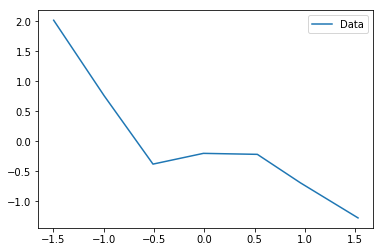

In [6]:
X = np.array(data.x)
y = np.array(data.y)

X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

plt.plot(X,y,label="Data")
plt.legend()

In [7]:
def init(k, X):
    W = np.random.rand(k+1)*4-2
    PHI = np.ones((X.size,k+1))
    for i in range(k+1):
        PHI[:,i] = np.power(X,i)
    return W,PHI

def learn(W,X,y,lamda,it,learning_rate):
    last_error = float("inf")
    error = []
    for i in range(1000000):
        
        W = W.copy() - learning_rate * d_J(W,X,y,lamda)
        
        error.append( np.sqrt( np.sum((h(W,X) - y)**2) ) )
        
        if last_error < np.sqrt( np.sum((h(W,X) - y)**2) ):
            learning_rate *= 0.1
        
        last_error = np.sqrt( np.sum((h(W,X) - y)**2) )
    print(learning_rate)
    return W, error

1.0000000000000009e-15
[-2.48284545e-08 -9.00652228e-01]
1.0000000000000006e-10
[-0.29623431 -0.90545601  0.29623427]
1.0000000000000006e-10
[-0.31506402 -0.14966751  0.3220009  -0.42777864]
1.0000000000000006e-10
[-0.30242893 -0.14853301  0.27678131 -0.4289562   0.01844355]
1.0000000000000005e-09
[-0.28588784  0.63532541  0.22537666 -1.93080787  0.02554756  0.5121189 ]
0.01
[-0.19695091  0.63349975 -0.67620637 -1.90563096  1.27292419  0.50846619
 -0.3810951 ]


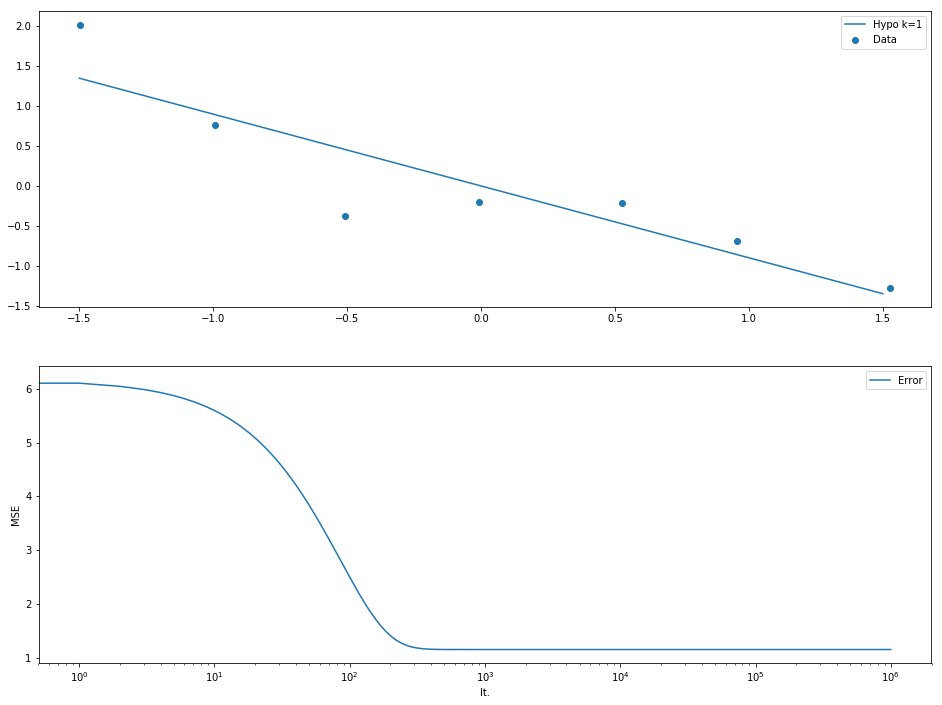

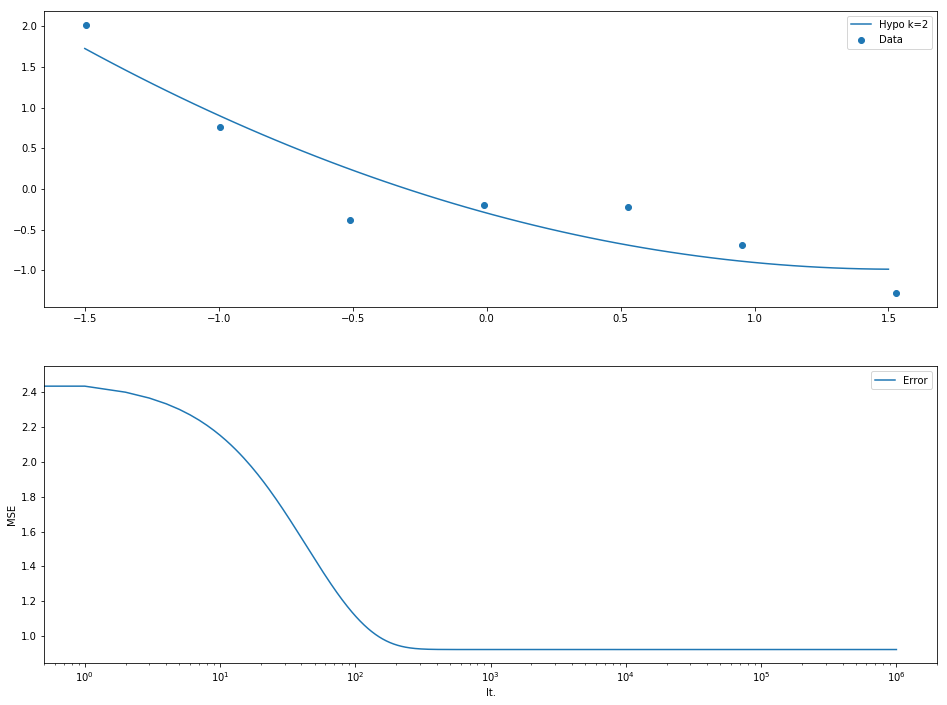

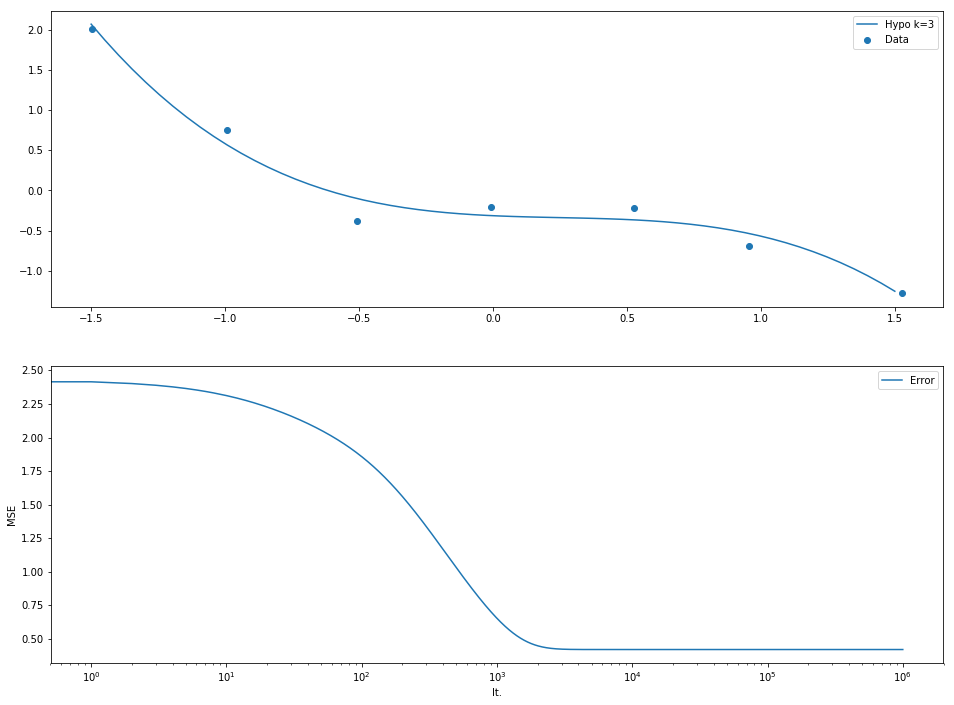

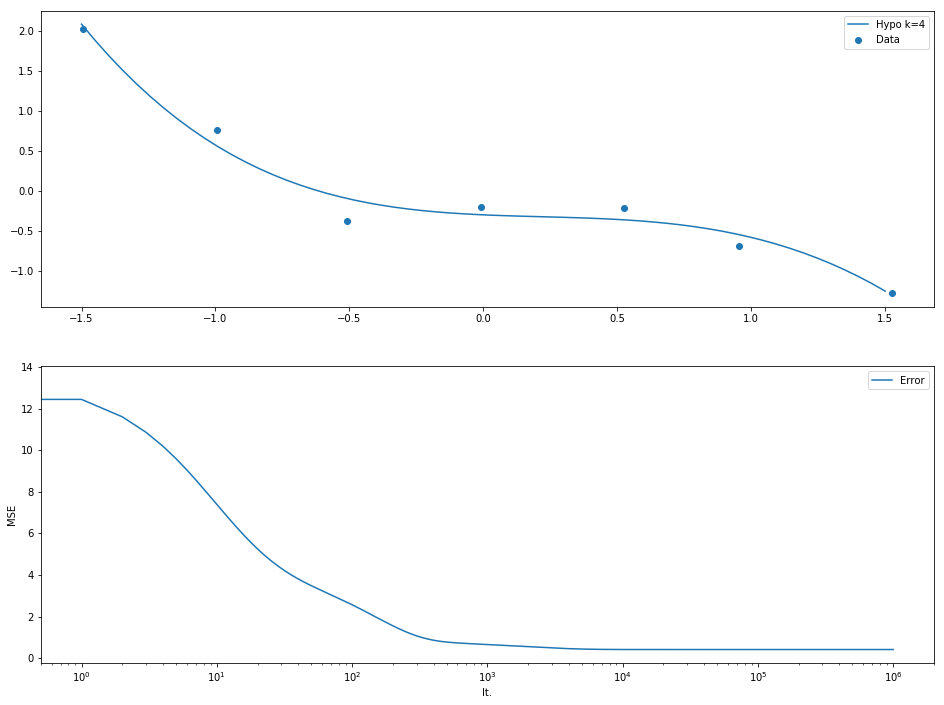

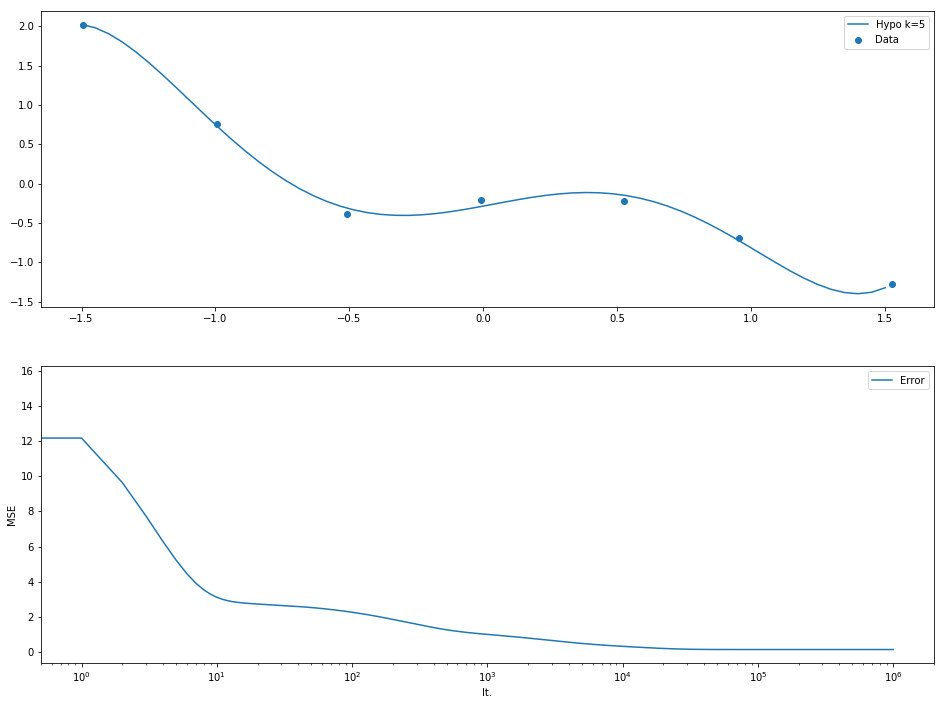

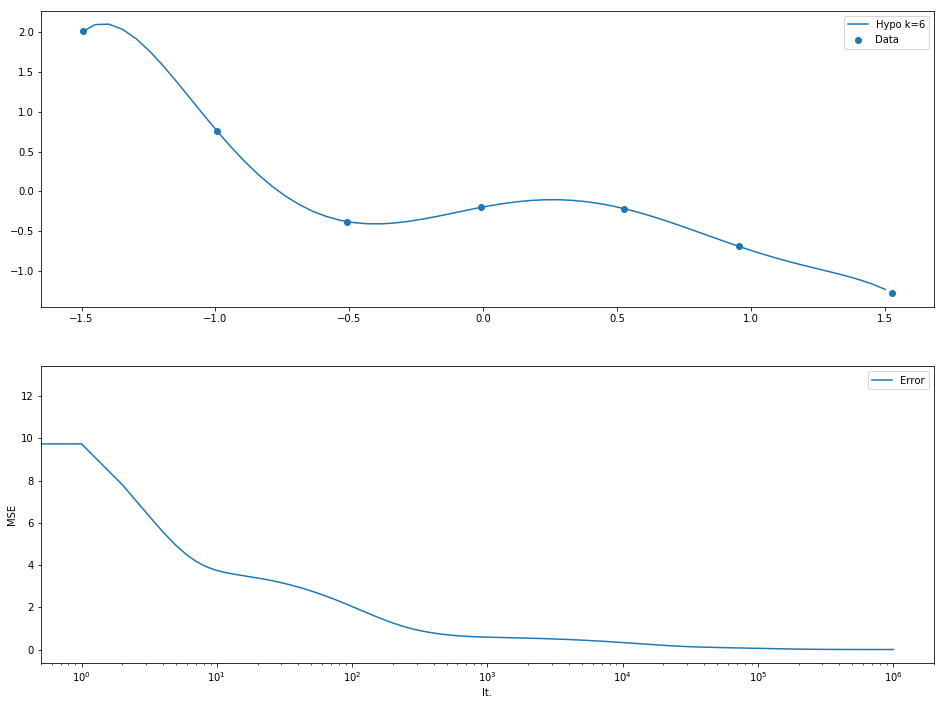

In [12]:
for k in range(1,7):
    lamda = 0
    learning_rate = 0.01
    W, PHI = init(k,X)

    W, error = learn(W,PHI,y,lamda,10000,learning_rate)
    
    plt.figure(figsize=(16,12))
    plt.subplot(211)
    plt.scatter(X,y,label="Data")
    
    lin = np.linspace(-1.5,1.5,60)
    plt.plot(lin,h(W,init(k,lin)[1]),label="Hypo k=" + str(k))
    plt.legend()

    plt.subplot(212)
    plt.plot(error,label="Error")
    plt.xscale('log')
    plt.ylabel("MSE")
    plt.xlabel("It.")
    plt.legend()
    print(W)

# Exercise 2.4

Apply	the	polynomial	regression	with	$L_2$ &-regularization to the poly-data. For	this,	fit	a	polynomial	of	order k =6
and	use	the	following	regularization	parameters:


$\lambda \in \{0,	0.001,	0.003,	0.01,	0.03,	0.1,	0.3,	1,	3,	10\}$

Plot	the	MSE	in	dependence	of the regularization	parameter. For	the	sake	of	clarity,	the	x-axis	should	be	scaled	
logarithmically.	For each $\lambda \in \{0,	0.01,	0.1,	1,	10\}$	create	a	plot	showing the	data	points	and	the	fitted polynomial.
Moreover,	print	the	learned	weights	for	$\lambda \in \{0,	0.01,	0.1,	1,	10\}$.	Discuss	your	results.

0.01
[-0.19695082  0.63349975 -0.67620716 -1.90563094  1.27292526  0.50846618
 -0.38109542]
0.01
[-0.20764103  0.6141274  -0.57816488 -1.8728994   1.14254286  0.49710074
 -0.34178494]
0.01
[-0.22309982  0.57766072 -0.43695604 -1.81022816  0.95521484  0.47555545
 -0.28531203]
1.0000000000000008e-14
[-0.22586528  0.45976738 -0.41824798 -1.59715291  0.93642436  0.40447196
 -0.27974127]
1.0000000000000002e-06
[-0.2721883   0.26935575  0.00702454 -1.259773    0.37265196  0.28970989
 -0.10935166]
1e-05
[-2.80640910e-01 -6.03002621e-04  1.17583343e-01 -7.58379163e-01
  2.15523632e-01  1.20147794e-01 -5.92746970e-02]
1e-05
[-0.2685297  -0.15654555  0.13090808 -0.42839545  0.1424802   0.00402857
 -0.02946668]
1e-05
[-0.23065445 -0.18039491  0.07866847 -0.21891251  0.07561376 -0.08502368
  0.00810536]
1.000000000000001e-16
[-0.21394311 -0.08031889  0.02868643 -0.10580078  0.03327367 -0.14604259
  0.03461308]


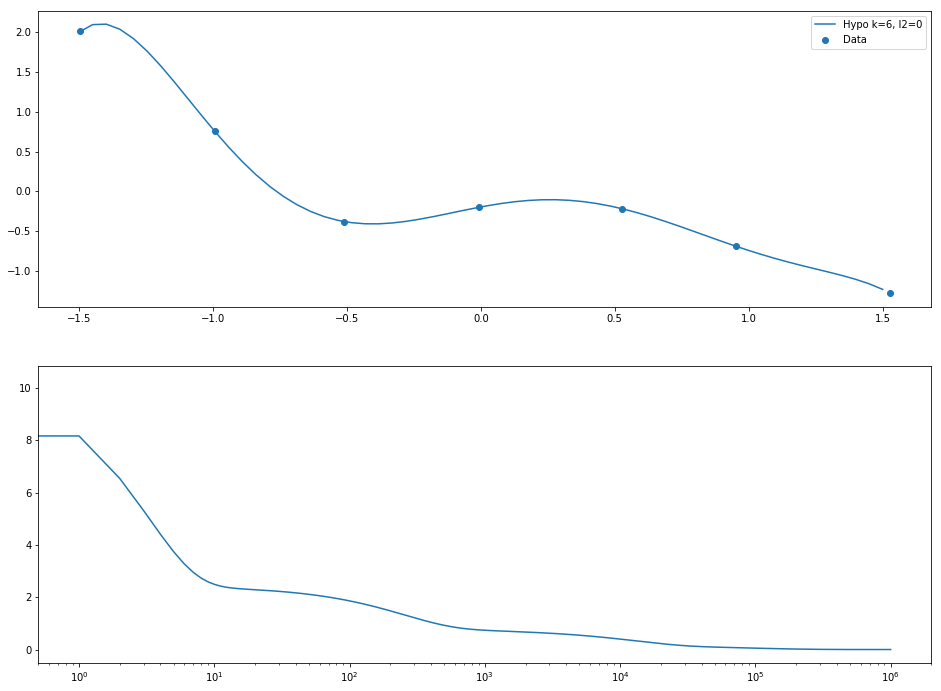

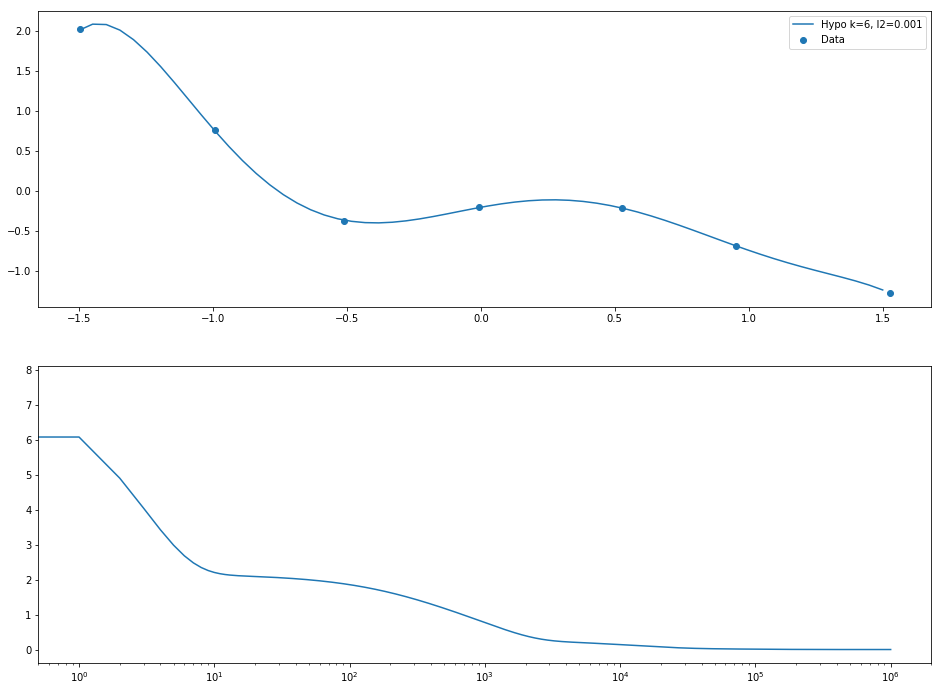

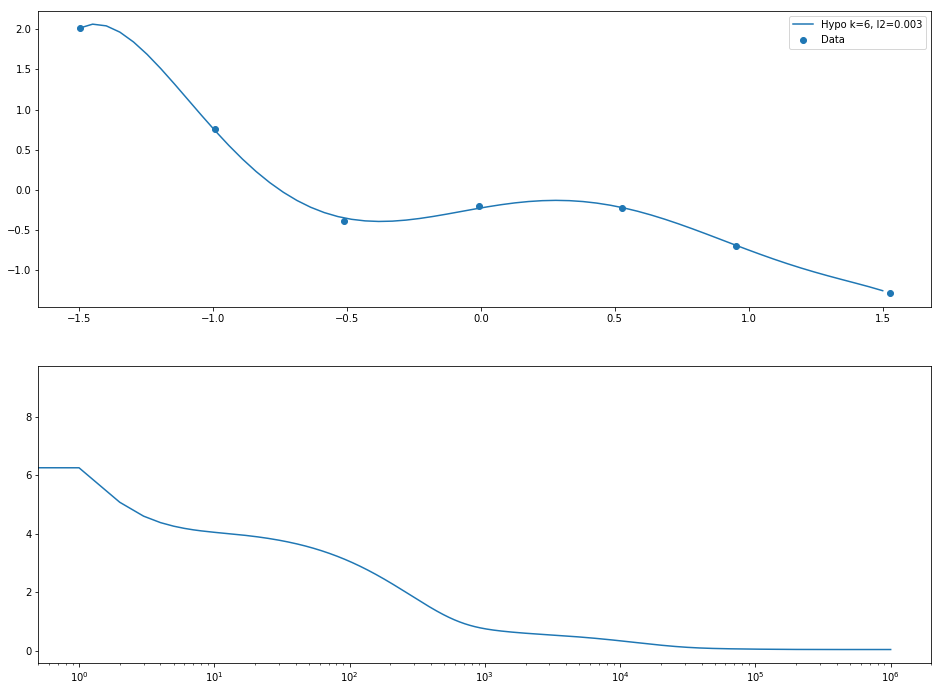

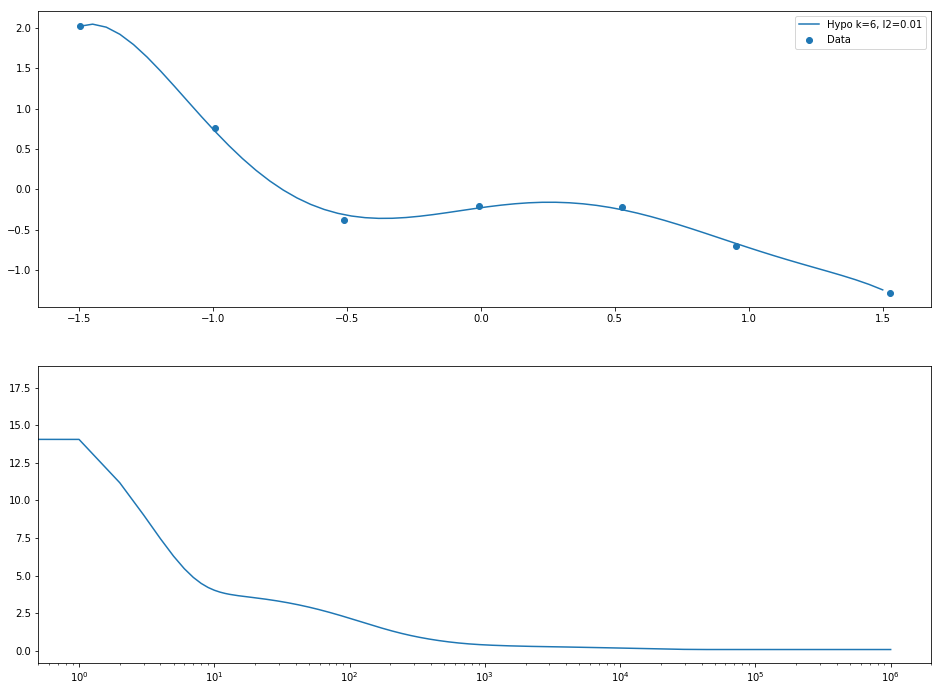

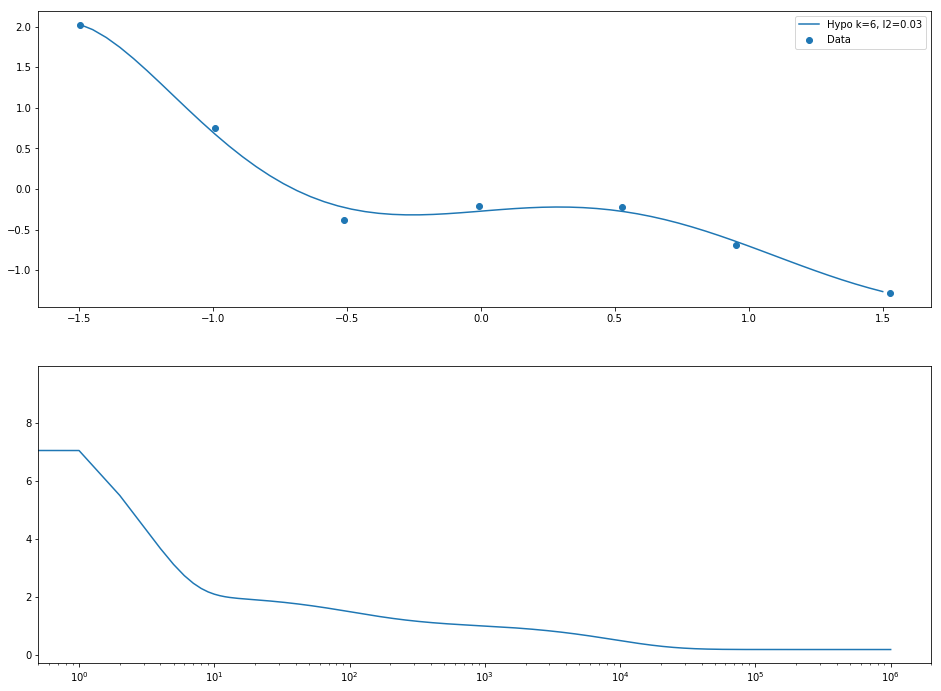

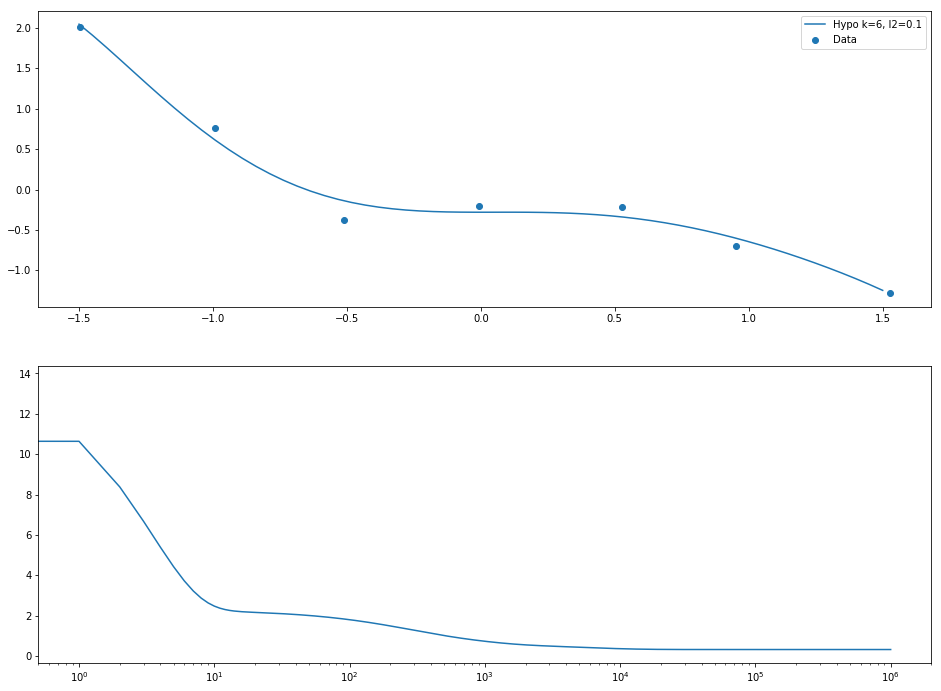

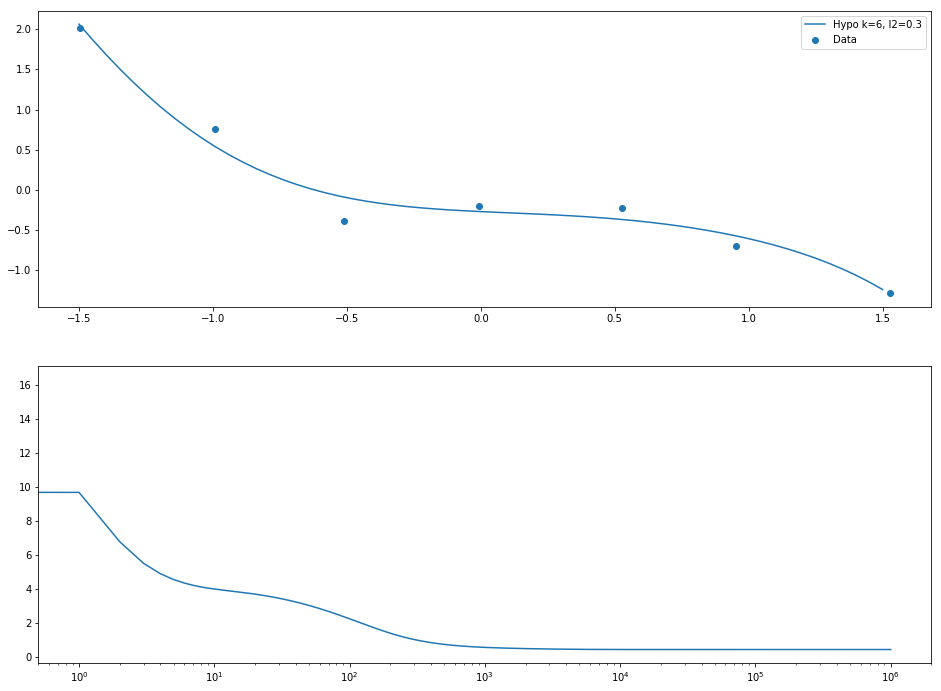

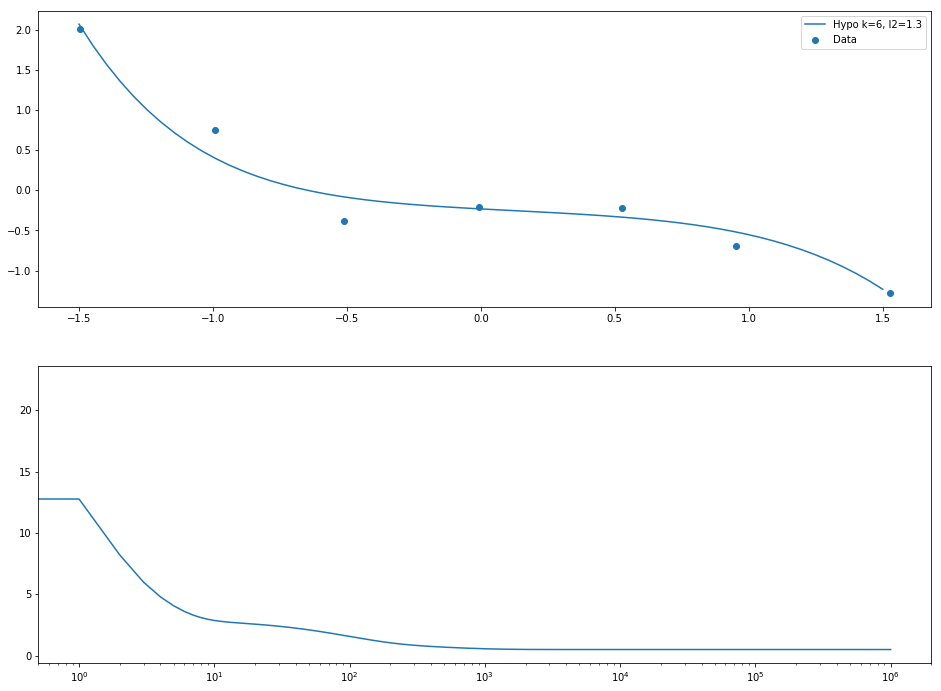

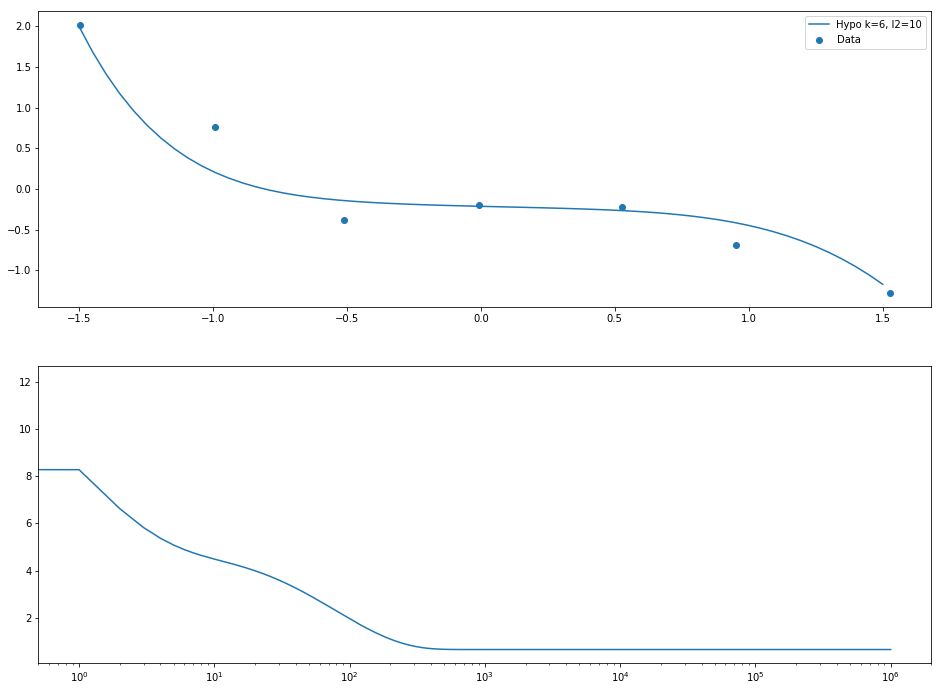

In [13]:
lamda = [0,0.001,0.003,0.01,0.03,0.1,0.3,1.3,10]

for l in lamda:
    learning_rate = 0.01
    k = 6
    W, PHI = init(k,X)

    W, error = learn(W,PHI,y,l,10000,learning_rate)
    
    plt.figure(figsize=(16,12))
    plt.subplot(211)
    plt.scatter(X,y,label="Data")
    
    lin = np.linspace(-1.5,1.5,60)
    plt.plot(lin,h(W,init(k,lin)[1]),label="Hypo k=" + str(k) + ", l2="+str(l))
    plt.legend()

    plt.subplot(212)
    plt.plot(error)
    plt.xscale('log')
    print(W)